In [1]:
pip install jupyter_contrib_nbextensions

You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


# Objectives of the Analysis


The objective of the analysis are as follows:
- What is the overall sales trend?
- What are the top 10 products by sales?
- What are the most selling product?
- Which is the most prefered ship mode?
- Which are the most profitable category and sub-category?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading file from excel
df = pd.read_excel("C:/Users/HP/Desktop/data/superstore_sales.xlsx")
# Show the first 5 rows of the data
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
# Read the last 5 rows of the data
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [5]:
# Get information of the number of rows and columns in the data
df.shape

(51290, 21)

In [6]:
# Get the unique names of the columns in the data
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [8]:
# Check if there are any missing values in the data
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [9]:
# Set order date as the data index in order to get the sales sum by resampling the date to months
df.set_index('order_date', inplace = True)
df.head()

,order_id,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
order_date,,,,,,,,,,,,,,,,,,,,
2011-01-01,AG-2011-2040,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
2011-01-01,IN-2011-47883,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2011-01-01,HU-2011-1220,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
2011-01-01,IT-2011-3647632,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
2011-01-01,IN-2011-47883,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [10]:
# Calc the sum of monthly sales 
sales_monthly= df.sales.resample("M").sum()

<AxesSubplot:xlabel='order_date'>

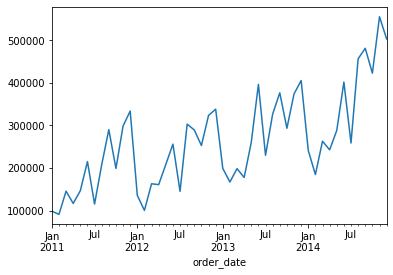

In [11]:
# Visualize the monthly sales 
sales_monthly.plot()

In [12]:
# Reset the index of the data to continue analyzing
df.reset_index(inplace = True)

In [14]:
# Calc the top 10 product by sales
product_sales = df.groupby("product_name").sales.sum().sort_values(ascending = False)
top_product_sales = product_sales[:10]
top_product_sales

product_name
Apple Smart Phone, Full Size                                86935.7786
Cisco Smart Phone, Full Size                                76441.5306
Motorola Smart Phone, Full Size                             73156.3030
Nokia Smart Phone, Full Size                                71904.5555
Canon imageCLASS 2200 Advanced Copier                       61599.8240
Hon Executive Leather Armchair, Adjustable                  58193.4841
Office Star Executive Leather Armchair, Adjustable          50661.6840
Harbour Creations Executive Leather Armchair, Adjustable    50121.5160
Samsung Smart Phone, Cordless                               48653.4600
Nokia Smart Phone, with Caller ID                           47877.7857
Name: sales, dtype: float64

list2

In [15]:
# Calc the most selling product using the aquantity sold
most_selling_prod = df.groupby("product_name").quantity.sum().sort_values(ascending = False)
most_selling_prod[:10]

product_name
Staples                                  876
Cardinal Index Tab, Clear                337
Eldon File Cart, Single Width            321
Rogers File Cart, Single Width           262
Sanford Pencil Sharpener, Water Color    259
Stockwell Paper Clips, Assorted Sizes    253
Avery Index Tab, Clear                   252
Ibico Index Tab, Clear                   251
Smead File Cart, Single Width            250
Stanley Pencil Sharpener, Water Color    242
Name: quantity, dtype: int64

In [16]:
# Calc the most used ship mode
df.groupby("ship_mode").count()

,order_date,order_id,ship_date,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
ship_mode,,,,,,,,,,,,,,,,,,,,
First Class,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505
Same Day,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701
Second Class,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309
Standard Class,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 360x144 with 0 Axes>

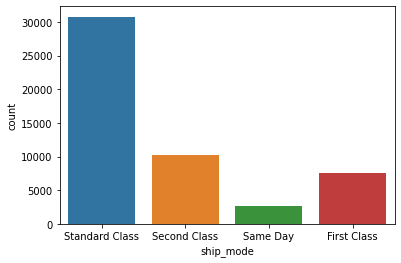

<Figure size 360x144 with 0 Axes>

In [17]:
# Visualise using seaborn to see the most the used ship mode
sns.countplot("ship_mode", data = df)
plt.figure(figsize= (5,2))

In [18]:
# Calc the most profitable profit by category and sub-category
df.groupby(["category", "sub_category"]).profit.sum().sort_values(ascending = False)

category         sub_category
Technology       Copiers         258567.54818
                 Phones          216717.00580
Furniture        Bookcases       161924.41950
                 Chairs          141973.79750
Office Supplies  Appliances      141680.58940
Technology       Accessories     129626.30620
Office Supplies  Storage         108461.48980
                 Binders          72449.84600
                 Paper            59207.68270
Technology       Machines         58867.87300
Office Supplies  Art              57953.91090
Furniture        Furnishings      46967.42550
Office Supplies  Envelopes        29601.11630
                 Supplies         22583.26310
                 Labels           15010.51200
                 Fasteners        11525.42410
Furniture        Tables          -64083.38870
Name: profit, dtype: float64